# Generate data to train the neural network

In [196]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [197]:
N = 20
ne = 3
ns = 2
nt = ne + ns
u = 20+10*np.random.rand(N)
y  = np.zeros(N)
y = 50+u
sd = y.size
sd
x1  = np.zeros(sd)
x2  = np.zeros(sd)
x12 = np.zeros(sd)
x22 = np.zeros(sd)
x1 = y
dt = 0.05


In [198]:
for i in np.arange(sd-1):
    x2_k1 = (x1[i+1]-x1[i])/dt
    x2[i+1] = x2_k1;



In [199]:
x12 = np.zeros(sd)
x22 = np.zeros(sd)

In [200]:
for i in np.arange(sd-1):
    x12_k1 = x1[i+1]
    x22_k1 = x2[i+1]
    x12[i+1] = x12_k1
    x22[i+1] = x22_k1



In [201]:
x1.size, x2.size, u.size, x12.size, x22.size

(20, 20, 20, 20, 20)

In [202]:
patron = np.concatenate([x1.reshape((-1,1)), x2.reshape((-1,1)), u.reshape((-1,1)), x12.reshape((-1,1)), x22.reshape((-1,1))])
# patron

In [203]:
# np.savetxt('patron.txt', patron, fmt='%10.4f')
              

In [204]:
iteration = np.arange(0,sd)


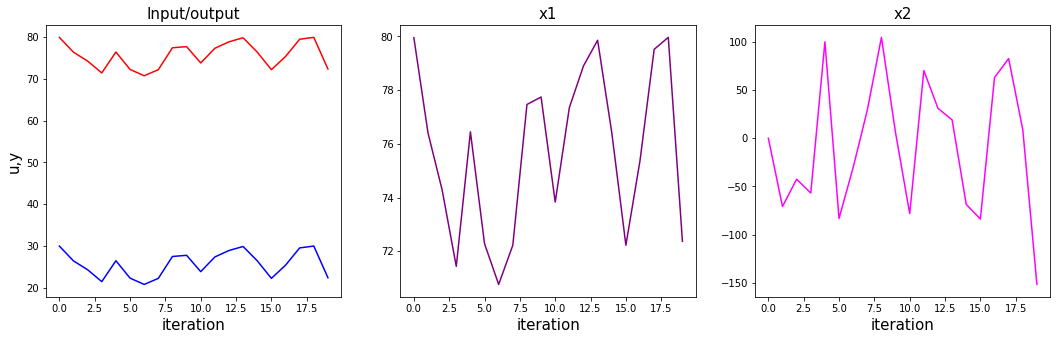

In [205]:
# Listo, podemos usar las tres columnas
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.set_title('Input/output',     fontsize=15)
ax1.plot(iteration, u, color='blue')  
ax1.plot(iteration, y, color='red')  
ax1.set_xlabel('iteration',    fontsize=15)
ax1.set_ylabel('u,y', fontsize=15)

ax2.set_title('x1',  fontsize=15)
ax2.plot(iteration, x1, color='purple')  
ax2.set_xlabel('iteration', fontsize=15)

ax3.set_title('x2',  fontsize=15)
ax3.plot(iteration, x2, color='magenta')  
ax3.set_xlabel('iteration', fontsize=15)

plt.show()


In [223]:
s_i1 = pd.Series(x1)
s_i2 = pd.Series(x2)
s_i3 = pd.Series(u)
s_o1 = pd.Series(x12)
s_o2 = pd.Series(x22)
len(s_i1), len(s_i2), len(s_i3), len(s_o1), len(s_o2)

(20, 20, 20, 20, 20)

In [236]:
df = s_i1.to_frame()
df2 = pd.concat([df, s_i2, s_i3, s_o1, s_o2], axis=1, ignore_index=True)




In [237]:
df2 = df2.rename({0: 'input_1', 1: 'input_2', 2: 'input_3', 3: 'output_1', 4: 'output_2'}, axis=1)
df2

,input_1,input_2,input_3,output_1,output_2
0,79.950186,0.000000,29.950186,0.000000,0.000000
1,76.406396,-70.875789,26.406396,76.406396,-70.875789
2,74.280945,-42.509028,24.280945,74.280945,-42.509028
3,71.436970,-56.879489,21.436970,71.436970,-56.879489
4,76.445864,100.177877,26.445864,76.445864,100.177877
5,72.279475,-83.327790,22.279475,72.279475,-83.327790
6,70.763619,-30.317126,20.763619,70.763619,-30.317126
7,72.222960,29.186827,22.222960,72.222960,29.186827
8,77.465435,104.849498,27.465435,77.465435,104.849498
9,77.743740,5.566112,27.743740,77.743740,5.566112


In [238]:
df2.to_csv('nn_pattern.csv')